# Récupération des données

In [0]:
import pandas

In [0]:
data_curiosity = pandas.read_csv("progress.csv")

In [70]:
print(data_curiosity)

        advmean    advstd  best_ret  ...        eplen  eprooms     rewtotal
0      0.633470  0.284476      -inf  ...          NaN      NaN          NaN
1      0.299184  0.149151       0.0  ...   214.500000     1.00          0.0
2      0.258139  0.150890       0.0  ...   305.166667     1.00          0.0
3      0.201525  0.148530       0.0  ...   369.416667     1.00          0.0
4      0.106822  0.132377       0.0  ...   430.954545     1.00          0.0
...         ...       ...       ...  ...          ...      ...          ...
24418 -0.004002  0.098157    7100.0  ...  2006.210000     9.89  127715000.0
24419 -0.010824  0.128366    7100.0  ...  1986.760000     9.82  127736900.0
24420 -0.010937  0.100258    7100.0  ...  2002.380000     9.86  127765300.0
24421  0.001317  0.112888    7100.0  ...  2001.040000     9.86  127772400.0
24422 -0.001694  0.097237    7100.0  ...  2001.040000     9.86  127772400.0

[24423 rows x 45 columns]


In [4]:
print(data_curiosity.columns)

Index(['advmean', 'advstd', 'best_ret', 'epcount', 'eprew', 'ev_ext', 'ev_int',
       'mem_available', 'n_rooms', 'n_updates', 'opt_approxkl', 'opt_auxloss',
       'opt_clipfrac', 'opt_ent', 'opt_featvar', 'opt_gradnorm', 'opt_maxfeat',
       'opt_maxkl', 'opt_pg', 'opt_tot', 'opt_vf', 'reset_counter',
       'retextmean', 'retextstd', 'retintmean', 'retintstd', 'rewintmax_norm',
       'rewintmax_unnorm', 'rewintmean_norm', 'rewintmean_unnorm',
       'rewintstd_unnorm', 'rooms', 'tcount', 'time_elapsed', 'tps',
       'vpredextmean', 'vpredextstd', 'vpredintmean', 'vpredintstd',
       'wait_policy_inference', 'wait_step', 'wait_update', 'eplen', 'eprooms',
       'rewtotal'],
      dtype='object')


- Episode count c’est epcount
- best return c’est le meilleur épisode reward(eprew) vu
- Adv c’est l’avantage
- N rooms c’est le nombre de rooms visiter dans le jeu
- Eplen c’est le temps de l’épisode

# Mise en forme graphique

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Simple plots

In [0]:
colors = sns.color_palette("colorblind")
marker = itertools.cycle(('+', '*', '.'))
datas = []
model_names = []

datas.append(data_curiosity)
model_names.append("Avec curiosité")

#here we can add other models to compare

relevant_columns = ["advmean", "n_rooms", "best_ret", "epcount", "eplen"] #here we can add other column names to compare

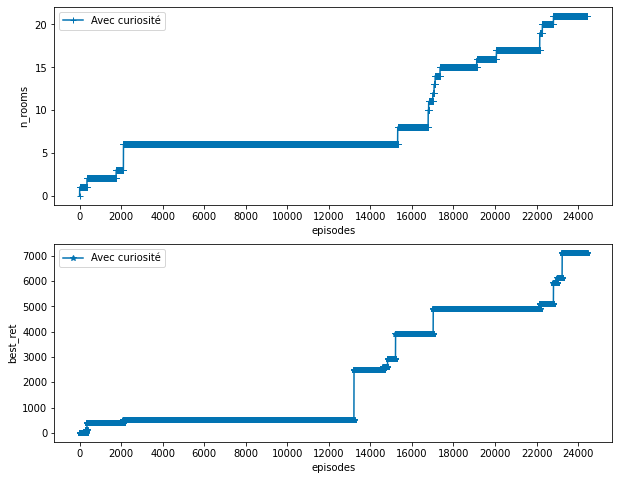

In [89]:
y_max = 0
for data in datas:
  y_max = max(y_max, len(data.index))

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("episodes")
  axs[i].set_xticks(np.arange(0, y_max, 2000))
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of mean over n rows

In [0]:
#calculate mean over n rows
datas_mean = []
n = 200
for data in datas:
  datas_mean.append(data.groupby(np.arange(len(data))//n).mean())

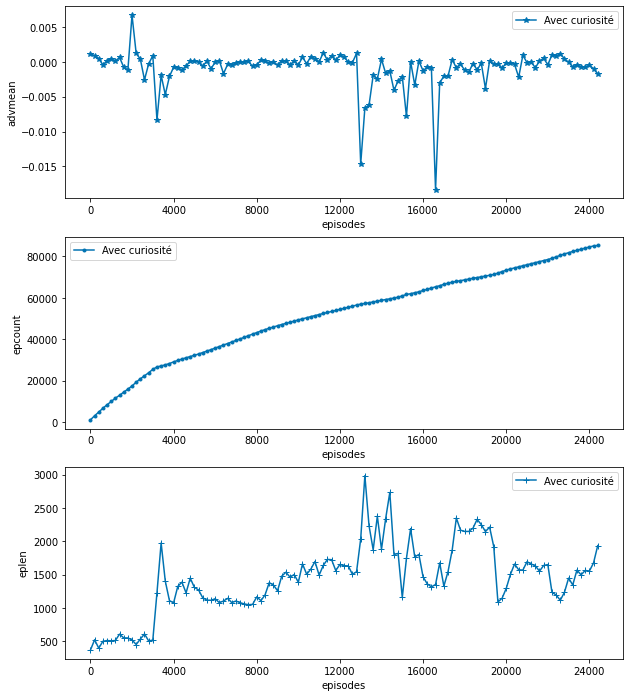

In [76]:
relevant_columns = ["advmean", "epcount", "eplen"] #here we can add other column names to compare

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("episodes")
  axs[i].set_xticks(np.arange(0, y_max, 20))
  axs[i].set_xticklabels(np.arange(0, y_max, 20)*200)
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas_mean:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of max over n rows

In [0]:
#calculate mean over n rows
datas_max = []
n = 200
for data in datas:
  datas_max.append(data.groupby(np.arange(len(data))//n).max())

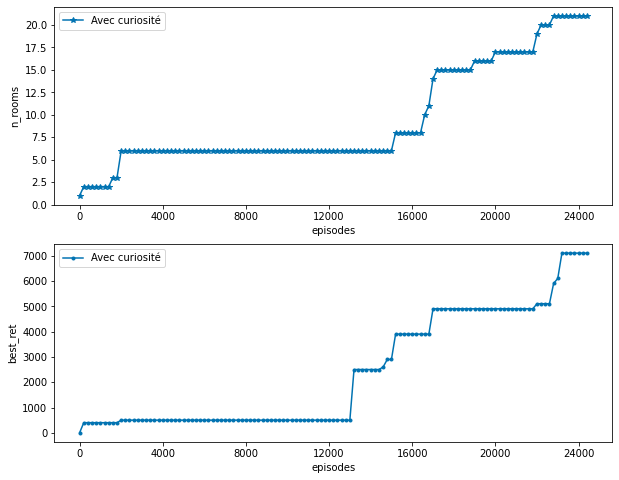

In [79]:
relevant_columns = ["n_rooms", "best_ret"] #here we can add other column names to compare

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("episodes")
  axs[i].set_xticks(np.arange(0, y_max, 20))
  axs[i].set_xticklabels(np.arange(0, y_max, 20)*200)
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas_max:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of couple of columns (mean, std)

In [0]:
#function to get lighter color
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

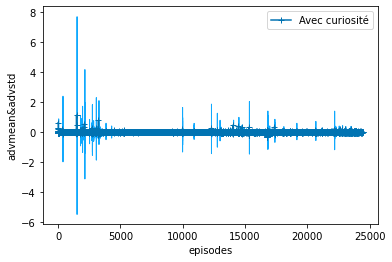

In [83]:
#plot mean and std
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

axs.set_xlabel("episodes")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')

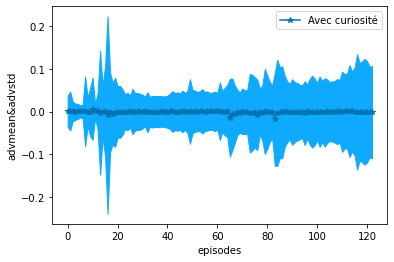

In [81]:
#plot mean and std (on mean values)
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

axs.set_xlabel("episodes")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas_mean:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')

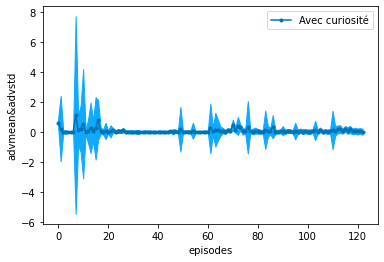

In [85]:
#plot mean and std (on max values)
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

axs.set_xlabel("episodes")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas_max:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')